<h1>Case - Estatística </h1>
<h2> Case Módulo 2 - VAI Academy </h2>






#Dataset
<p> Amazon Top 50 Bestselling Books 2009 - 2019 <br>
https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
</p>


Para a análise dos dados e teste de hipóteses são utilizadas algumas bibliotecas indicadas abaixo:

In [1]:
import pandas as pd                                                             #Para se trabalhar com DataFrame
import numpy as np                                                              #Operações matemáticas com arrays
import matplotlib.pyplot as plt                                                 #Algumas ferramentas de plotagem de gráficos
import seaborn as srn                                                           #Plotagem de gráficos
#Comando para que os gráficos sejam plotados dentro das células do notebook
%matplotlib inline                                                              
from numpy.random import seed, rand, normal, exponential, binomial, poisson     #Biblioteca para se lidar com algumas ferramentas estatísticas
import random                                                                   #Valor random
import scipy.stats as stats                                                     #Ferramentas estatísticas
from scipy.stats import ttest_ind, normaltest, pearsonr                         #Ferramentas estatísticas
srn.set()

Após a definição das bilbiotecas que serão utilizadas na análise, é feito o upload dos dados e leitura inicial das primeiras 5 linhas.

In [2]:
html_dados = 'https://github.com/mjuliacsouza/_datasets/blob/main/archive.zip?raw=true'       #O dataset foi colocado no github para ser acessado toda 
                                                                                                  #vez sem necessidade de fazer upload
dados = pd.read_csv (html_dados, compression='zip')                                           #Leitura do DataFrame

dados.head()                                                                                  #Visualização dos dados

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Sabe-se de antemão que os dados são os 50 livros bestseller dos anos de 2009 a 2019, ou seja, 11 anos, tendo 550 linhas. Além disso, vemos que cada linhas apresenta dados em 7 colunas: 

*   'Name' (Nome do Livro)
*   'Author' (Autor do Livro)
*    'User Rating' (avaliação do usuário)
* 'Reviews" (número de avaliações)
* 'Price' (preço do livro)
* 'Year' (ano em que este livro está como Bestseller), e 
*  'Genre' (o gênero literário).

Uma primeira alterações que será feita é para que todas as colunas não tenham espaços vazios no seu nome, apenas para se utilizar as bilbiotecas de maneira mais fácil. Abaixo estão os novos nomes das colunas (apenas 'User_Rating' foi alterada).

In [3]:
dados.columns = dados.columns.str.replace(' ', "_")
dados.columns

Index(['Name', 'Author', 'User_Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

Agora vamos analisar os dados para identificar quais tipos de variáveis apresentam e como estão distribuídos para poder conhecer um pouco mais sobre a análise a ser realizada.

# Análise Estatística dos Dados


Primeiramente, havia sido feita uma consideração que os dados teriam 550 linhas, apresentando os 50 livros da lista de Bestseller durante 11 anos (2009 a 2019), tal pressuposto pode ser testado através da avaliação abaixo, onde também temos as 7 colunas citadas anteriormente.

In [4]:
dados.shape

(550, 7)

Vamos analisar agora cada coluna de dados separadamente e ver quais conclusões podem ser retiradas.

Começando pela coluna 'Name', podemos ver abaixo que das 550 linhas de livros apresentados nos dados, alguns livros aparecem mais de uma vez pois, agrupando os dados com relação aos Nomes dos Livros vemos que tal agrupamento apresenta um 'Lenght' (tamanho) de 351 dados. Além disso, aplicando o método 'size()' é possível identificar a quantidadde de vezes em que tal livro aparece como Bestseller na Lista.

In [5]:
dados.groupby('Name').size()

Name
10-Day Green Smoothie Cleanse                                                             1
11/22/63: A Novel                                                                         1
12 Rules for Life: An Antidote to Chaos                                                   1
1984 (Signet Classics)                                                                    1
5,000 Awesome Facts (About Everything!) (National Geographic Kids)                        1
                                                                                         ..
Winter of the World: Book Two of the Century Trilogy                                      1
Women Food and God: An Unexpected Path to Almost Everything                               1
Wonder                                                                                    5
Wrecking Ball (Diary of a Wimpy Kid Book 14)                                              1
You Are a Badass: How to Stop Doubting Your Greatness and Start Living an A

Partindo para a coluna 'Author' vemos novamente que o número de autores na lista de Bestseller ('Lenght': 248) é menor do que o número de linhas de dados (550), isso já era esperado considerando que há livros que aparecem mais de uma vez, porém, a surpresa aqui é que o número de autores diferentes (248) é inferior ao número de Livros diferentes (351), ou seja, tais autores escreveram mais de um Bestseller. Tal dado pode ser provado aplicando a função 'size()' onde temos a informações de quantas vezes o autor apareceu na lista.

In [6]:
dados.groupby('Author').size()

Author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Length: 248, dtype: int64

As próximas colunas são valores numéricos que podem ser analisados através da função 'describe()', como mostrado abaixo. Podemos ver que as avaliações dos usuários variam de 3.3 a 4.9; que a variável que tem maior variação de valores é a de 'Reviews', apresentando valores bem altos; a coluna 'Price' variando de 0 a 105 e o 'Year' que como esperado varia de 2009 a 2019.

In [7]:
dados[['User_Rating','Reviews','Price','Year']].describe()

,User_Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Quanto aos reviews podemos realizar outra análise, pegando o livro 'Wonder' que, segundo a análise de nomes de livros, apareceu 5 vezes nos dados, vemos que o número de Reviews permanece o mesmo para todas as vezes que ele aparece, isso pois os valores de 'Reviews' representa o número de reviews escritas no site no dia da coleta de dados, assim é um valor total para cada livro. Podemos ver também que o valor de User_Rating também apresenta a mesma análise, não mudando com os anos e o 'Price' também é um valor constante.

In [8]:
dados.query('Name == "Wonder"')

,Name,Author,User_Rating,Reviews,Price,Year,Genre
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction


Por último é possível analisar a coluna 'Genre' que apresenta apenas dois valores possíveis: 'Fiction' e 'Non Fiction', o número de vezes com que esses valores aparecem nos dados está mostrada abaixo e é possível ver que todos os livros estão classificados nessas categorias (240 + 310 = 550).

In [9]:
dados.groupby('Genre').size()

Genre
Fiction        240
Non Fiction    310
dtype: int64

##Primeiras conclusões 

Depois da análise inicial dos dados é possível listar algumas características de tal DataFrame.



*   Os livros podem aparecer nos dados mais de uma vez em anos diferentes.
*   Existem autores nessa lista que apresentam mais de um livro Bestseller
*   Além disso, as reviews representam os valores totais para aquele livro, independente do ano, assim como os valores de Price e User_Rating também não muda para livros que se repetem.



#Hipóteses



Após a análise descritiva dos dados será analisado, inicialmente, as hipóteses propostas pelo cliente que estão listadas abaixo.

1.   Desde o seu início, a VBooks teve como foco vender e estocar livros de ficção, assumindo como hipótese que eram os preferidos pelos consumidores. Entretanto, nos últimos anos foi percebida uma possível mudança de comportamento: mais consumidores estariam buscando por livros de não-ficção, indicando uma possível mudança de preferências dos leitores em geral.

2.   Outra hipótese trazida pelos donos da empresa é a diversificação de livros na lista de bestsellers ao longo dos anos, de forma que os livros estariam ficando menos tempo na lista de bestsellers com o passar do tempo. 

3.   Por fim, a alta direção acredita que as notas médias dos livros possuem maior influência na quantidade de vendas e tempo na lista de bestsellers do que os seus preços.

Para a análise de cada um dos tópicos será feito uma limpeza dos dados para a análise apenas das variáveis necessárias, a apresentação gráfica das variáveis propostas e depois testes das hipóteses buscando alguma correlação que leva a hipótese a ser descartada ou não.

## Hipótese 1

Desde o seu início, a VBooks teve como foco vender e estocar livros de ficção, assumindo como hipótese que eram os preferidos pelos consumidores. Entretanto, nos últimos anos foi percebida uma possível mudança de comportamento: mais consumidores estariam buscando por livros de não-ficção, indicando uma possível mudança de preferências dos leitores em geral.


Fazendo primeiramente uma análise do total de livros dentro das duas categorias temos os números abaixo. Onde vemos que ao longo dos 11 anos propostos pelos dados, há 240 livros de Ficcção e 310 de Não-Ficção. Mas ainda precisamos de mais informações sobre isso para tirarmos conclusões.

In [10]:
pd.crosstab(index=dados.Genre, columns='count')

col_0,count
Genre,
Fiction,240
Non Fiction,310


Vamos analisar como o gênero dos livros são alterados ao longo do tempo. Para isso se levará em conta apenas as colunas 'Year' e 'Genre'. Através da tabela abaixo é possível ver, numericamente, a quantidade de livros 'Fiction' e 'Non Fiction' de acordo com o ano, olhando apenas a tabela não é possível tirar muitas conclusões, apenas que em todos anos temos livros das duas categorias, vamos olhar graficamente.

In [11]:
Genre_Year = pd.crosstab(index=dados.Genre, columns=dados.Year, margins=True)
Genre_Year

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,All
Genre,,,,,,,,,,,,
Fiction,24,20,21,21,24,29,17,19,24,21,20,240
Non Fiction,26,30,29,29,26,21,33,31,26,29,30,310
All,50,50,50,50,50,50,50,50,50,50,50,550


Através do traçado do gráfico é possível perceber que a hipótese da VBooks de que os leitores tinham uma preferência por livros de ficção e de havia uma mudança ao longo do tempo tem um contraste importante com os dados. Aqui indica-se de que durante os anos de 2009 a 2019, com excessão de 2014, os leitores preferiram sempre os livros de Não Ficção. Pelo gráfico pode perceber-se também que, com excessão do ano de 2014, esses valores permaneceram em uma faixa de valores característica. Vamos investigar.

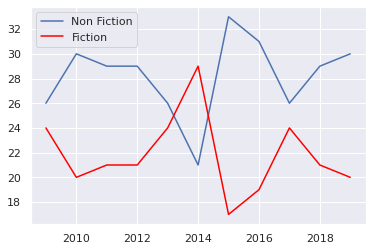

In [12]:
srn.lineplot(y=Genre_Year.iloc[1,:11].values, x=Genre_Year.columns[:11].values, label='Non Fiction')
srn.lineplot(y=Genre_Year.iloc[0,:11].values, x=Genre_Year.columns[:11].values, label='Fiction', color='red')

Aqui, olhando a distribuição dos valores pela função 'describe()', vemos que, pela média, o número de livros de Não-Ficção (28.2) foi superior aos de Ficção (21.8), sendo que os dois apresentam um valor de variância bem próxima. Mas será que houve uma mudança nessa tendência ao longo do tempo, como é apresentado pela hipótese?

In [13]:
Genre_Year.iloc[:,:11].T.describe().T

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Fiction,11.0,21.818182,3.250175,17.0,20.0,21.0,24.0,29.0
Non Fiction,11.0,28.181818,3.250175,21.0,26.0,29.0,30.0,33.0
All,11.0,50.000000,0.000000,50.0,50.0,50.0,50.0,50.0


Para isso vamos utilzar a mesma tabela, porém normalizada.

In [14]:
Genre_Year_NORM = pd.crosstab(index=dados.Genre, columns=dados.Year, margins=True, normalize='columns')
Genre_Year_NORM

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,All
Genre,,,,,,,,,,,,
Fiction,0.48,0.4,0.42,0.42,0.48,0.58,0.34,0.38,0.48,0.42,0.4,0.436364
Non Fiction,0.52,0.6,0.58,0.58,0.52,0.42,0.66,0.62,0.52,0.58,0.6,0.563636


Aqui é realizado o teste de Hipótese de Pearson entre a quantidade normalizada de livros de Não-Ficção em cada ano em relação ao ano. 

In [15]:
# Vamos verificar se há correlação linear entre a quantidade de livros de Não Ficção por gênero e o ano
alpha = 0.05 # significância desejada

data1 = Genre_Year_NORM.iloc[1,:11].values
data2 = Genre_Year_NORM.columns[:11].values

# Retorna o coeficiente de correlação de Pearson e o valor p to teste de pearson
corr, p = pearsonr(data1, data2)

if p < alpha:
    print("Rejeitamos a hipótese nula.")
    print("Concluímos que existe uma relação linear entre as populações das amostras")
else:
    print("Não podemos rejeitar a hipótese nula.")
    print("Concluímos que a correlação não é estatisticamente significativa. Ou concluímos que não existe uma correlação linear significativa.")

print("valor-p: ", p)
print("alpha:   ", alpha)
print("Coeficiente de correlação:", corr)

Não podemos rejeitar a hipótese nula.
Concluímos que a correlação não é estatisticamente significativa. Ou concluímos que não existe uma correlação linear significativa.
valor-p:  0.6236159779989507
alpha:    0.05
Coeficiente de correlação: 0.166981916425345


###Conclusão

Vemos que o coeficiente de correlação obtido (0.167) não é suficiente para que afirme-se que há um aumento de livros de Não-Ficção durante os 11 anos de análise dos dados. Porém, como foi comprovado anteriormente, a quantidade média de livros de Não Ficção em relação aos de Ficção ao longo do tempo é sempre superior, ou seja, a Livraria VBooks deveria sim diversificar sua estante com a adição de livros de Não Ficcção, sendo essa uma ótima oportunidade de aumentar o Lucro da Livraria visto que esses livros tem uma atenção superior aos de Ficção segundo a análise da lista de Bestsellers.

##Hipótese 2

Outra hipótese trazida pelos donos da empresa é a diversificação de livros na lista de bestsellers ao longo dos anos, de forma que os livros estariam ficando menos tempo na lista de bestsellers com o passar do tempo. 

Para isso vamos analisar os livros que apareceram na lista de Bestsellers, vemos abaixo que temos 351 livros diferentes que aparecem entre os 50 livros Bestsellers entre os anos de 2009 e 2019.

In [16]:
dados.Name.unique().shape

(351,)

Entre esse 351 livros é possível saber quantas vezes eles aparecem na lista, ou seja, isso representa quantos anos eles permaneceram na lista dos 50 bestsellers. Aqui estão os 5 livos que ficaram mais tempo durante os 11 anos de análise. Pode-se, também, consultar os anos em que cada ano permaneceu na lista.

In [17]:
dados.Name.value_counts(ascending=False).head()

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
The Very Hungry Caterpillar                                                      7
Name: Name, dtype: int64

In [18]:
dados.query('Name == "Publication Manual of the American Psychological Association, 6th Edition"').Year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [19]:
dados.query('Name == "StrengthsFinder 2.0"').Year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

Para analisar os livros e quanto tempo eles ficam dentro so bestsellers ao longo do tempo, montou-se um novo DataFrame que apresenta como colunas:

*    Livro (nome do livro)
*    Anos de Bestseller (quantidade de anos em que ficou como Bestseller
*    1º ano de Bestseller

Aqui temos novamente os primeiros 5 livros com mais anos na lista dos Bestsellers.

In [20]:
livros_anos = pd.DataFrame({'Livro':dados.groupby("Name").Year.count().index,
                            'Anos de Bestseller':dados.groupby("Name").Year.count().values[:],
                            '1º ano de Bestseller':dados.groupby("Name").Year.min().values[:]})
livros_anos = livros_anos.sort_values(by='Anos de Bestseller',ascending=False)
livros_anos.head()

,Livro,Anos de Bestseller,1º ano de Bestseller
191,Publication Manual of the American Psychologic...,10,2009
209,StrengthsFinder 2.0,9,2009
178,"Oh, the Places You'll Go!",8,2012
310,The Very Hungry Caterpillar,7,2013
219,The 7 Habits of Highly Effective People: Power...,7,2009


Vamos analisar estatísticamente esse DataFrame, vemos que em média os anos ficam 1.5 anos como Bestseller, tendo uma variação muito pequena (std) indicando que até o 3º quartil o valor chega apenas até 2, ou seja, os livros que ficam mais de 2 anos como Bestseller representam apenas 25% dos livros totais analisados durante os 11 anos. O que não se sabe é se essa tendência aumentou ou diminuiu ao longo do tempo, como pede a hipótese.

In [21]:
livros_anos.describe()

,Anos de Bestseller,1º ano de Bestseller
count,351.000000,351.000000
mean,1.566952,2013.512821
std,1.271868,3.278367
min,1.000000,2009.000000
25%,1.000000,2010.000000
50%,1.000000,2013.000000
75%,2.000000,2016.000000
max,10.000000,2019.000000


Vamos agora ver graficamente como a quantidade de anos de Bestseller se altera conforme o primeiro ano do livro como Bestseller. Olhando erroneamente o gráfico até pode-se parecer que livros lançados mais próximo de 2019 tiveram uma queda quanto a anos de Bestseller, mas vale lembrar que os dados analisados apenas apresentam os livros que estiveram dentre os Bestsellers durante os 11 anos, ou seja, não se sabe se os livros que estavam na lista em 2019, por exemplo, permaneceram na lista em 2020 e assim suscetivamente, assim tal gráfico não nos traz nenhuma informação nova.

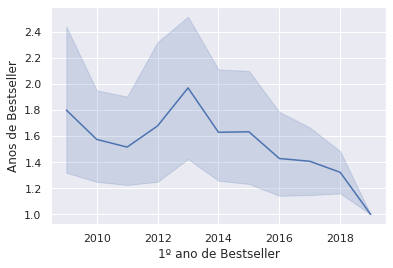

In [22]:
srn.lineplot(data=livros_anos, x='1º ano de Bestseller', y='Anos de Bestseller')

Para que tal análise do número de anos em Bestseller ao longo do tempo pode ser feita, pode-se utilizar várias ferramentas estatísticas, vamos investigar a mediana e a moda. Vemos que tanto utilizando a mediana quanto a moda o valor para todos os anos é de 1, ou seja, pode-se dizer que o mais comum é os livros permanecerem apenas 1 ano como Bestseller.

In [23]:
livros_anos.groupby('1º ano de Bestseller')['Anos de Bestseller'].agg(pd.Series.median)

1º ano de Bestseller
2009    1
2010    1
2011    1
2012    1
2013    1
2014    1
2015    1
2016    1
2017    1
2018    1
2019    1
Name: Anos de Bestseller, dtype: int64

In [24]:
livros_anos.groupby('1º ano de Bestseller')['Anos de Bestseller'].agg(pd.Series.mode)

1º ano de Bestseller
2009    1
2010    1
2011    1
2012    1
2013    1
2014    1
2015    1
2016    1
2017    1
2018    1
2019    1
Name: Anos de Bestseller, dtype: int64

Mas já vimos que para que isso pode mudar para o 3º quartil dos dados.

Um método para se investigar seria considerar qual a probabilidade de um livro que está na lista de Bestseller em um determinado ano estar ainda nessa lista no próximo ano. Para isso é preciso comparar a lista de livros entre os anos e ver quantos se mantém.

In [25]:
lista_anos = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
lista_rel = []
for ano in lista_anos[:-1]:
  count=0
  lista_a =[]
  for i in range(50):
    for j in range(50):
      if (dados[dados['Year']==ano]['Name'].iloc[i] == dados[dados['Year']==ano+1]['Name'].iloc[j]):
          count += 1
  lista_a = [ano+1, count]
  lista_rel.append(lista_a)
print(lista_rel)

[[2010, 10], [2011, 18], [2012, 22], [2013, 17], [2014, 21], [2015, 18], [2016, 22], [2017, 22], [2018, 18], [2019, 20]]


Aqui obtemos uma lista que, por exemplo, no primeiro elemento fala que 10 livros que estavam no Bestseller em 2009 permaneceram nele em 2010 e assim suscetivamente. Dividindo tais números por 50 (total de livros em cada lista por ano) temos a probabilidade de um livro permanecer na lista de Bestseller.

In [26]:
for i in range(10):
  lista_rel[i][1] = lista_rel[i][1]/50
print(lista_rel)

[[2010, 0.2], [2011, 0.36], [2012, 0.44], [2013, 0.34], [2014, 0.42], [2015, 0.36], [2016, 0.44], [2017, 0.44], [2018, 0.36], [2019, 0.4]]


In [27]:
prob_permanecer = pd.DataFrame(columns=['Probabilidade de ficar Bestseller', 'Ano'])
prob_permanecer['Ano'] = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
lista=[]
for i in range(10):
  lista.append(lista_rel[i][1])
prob_permanecer['Probabilidade de ficar Bestseller'] = lista
prob_permanecer

,Probabilidade de ficar Bestseller,Ano
0,0.20,2010
1,0.36,2011
2,0.44,2012
3,0.34,2013
4,0.42,2014
5,0.36,2015
6,0.44,2016
7,0.44,2017
8,0.36,2018
9,0.40,2019


Assim obtemos um dataframe com o ano e o valor normalizado de livros que permaneceram do ano anterior, plotando isso obtemos o gráfico abaixo em que vemos que o valor não se alterou muito ao longo do tempo, o que é um indicativo de que a hipótese 2 pode estar errada.

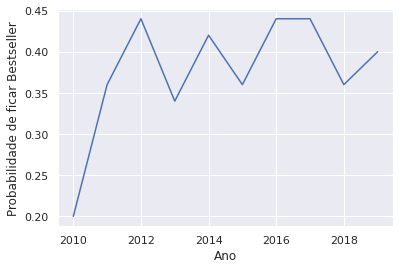

In [28]:
srn.lineplot(data=prob_permanecer, x='Ano', y='Probabilidade de ficar Bestseller')

Vamos ver se ao longo do tempo essa probabilidade subiu ou caiu.

In [29]:
# Vamos verificar se há correlação linear entre permanecer como Bestseller e ano:
alpha = 0.05 # significância desejada

data1 = prob_permanecer['Ano']
data2 = prob_permanecer['Probabilidade de ficar Bestseller']

# Retorna o coeficiente de correlação de Pearson e o valor p to teste de pearson
corr, p = pearsonr(data1, data2)

if p < alpha:
    print("Rejeitamos a hipótese nula.")
    print("Concluímos que existe uma relação linear entre as populações das amostras")
else:
    print("Não podemos rejeitar a hipótese nula.")
    print("Concluímos que a correlação não é estatisticamente significativa. Ou concluímos que não existe uma correlação linear significativa entre x e y na população")

print("valor-p: ", p)
print("alpha:   ", alpha)
print("Coeficiente de correlação:", corr)

Não podemos rejeitar a hipótese nula.
Concluímos que a correlação não é estatisticamente significativa. Ou concluímos que não existe uma correlação linear significativa entre x e y na população
valor-p:  0.12905497697146007
alpha:    0.05
Coeficiente de correlação: 0.5134257095803961


###Conclusão

Não foi suficiente para que uma correlação entre os dois fatores fosse obtida, como já foi falado, a maioria dos livros (75%) fica apenas um ano como Bestseller.

##Hipótese 3:

Por fim, a alta direção acredita que as notas médias dos livros possuem maior influência na quantidade de vendas e tempo na lista de bestsellers do que os seus preços.

Vamos olhar para como o preço e as notas médias dos livros estão distribuídos pelos dados, fazendo uma primeira análise.

Como já falado anteriormente o 'User_Rating' apresenta valores entre 3.3 e 4.9, porém vemos que sua média é alta, 4.6, assim como, pelos percentis, menos de 25% dos dados apresentam valores avaixo de 4.5, isso é um grande potencial para investigar qual a distribuição de notas médias, pois a hipótese proposta pela livraria VBooks pode estar correta.

Quanto ao 'Price' vemos que os valores vão de 0 a 105 com a média em 13.1, sendo que 75% dos dados tem preço até 16, ou seja, apenas 25% dos livros apresentam preços mais altos (acima de 16), esses dados, então, não apresenta muita representatividade, uma vez que sua variância é alta (10.8), mas tudo isso deve ser investigado melhor.

In [30]:
dados[['User_Rating','Price']].describe()

,User_Rating,Price
count,550.000000,550.000000
mean,4.618364,13.100000
std,0.226980,10.842262
min,3.300000,0.000000
25%,4.500000,7.000000
50%,4.700000,11.000000
75%,4.800000,16.000000
max,4.900000,105.000000


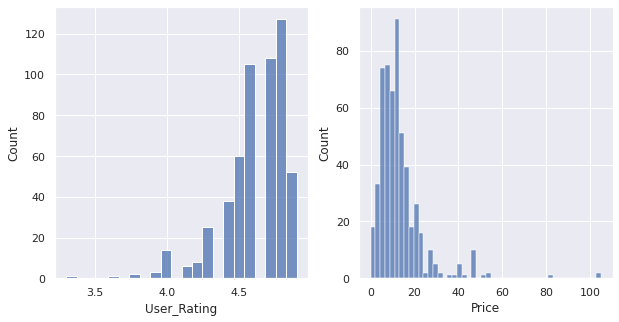

In [31]:
fig, ax =plt.subplots(1,2, figsize=(10,5))
srn.histplot(dados,x= "User_Rating",ax=ax[0])
srn.histplot(dados,x= "Price",ax=ax[1])

Pela apresentação da hipótese vemos que quer-se testar quais dos dois parâmetros (preço ou nota de avaliação) tem mais influência sobre a quantidade de vendas e tempo na lista. Porém, nos dados, não temos a informação a respeito da quantidade de vendas, temos apenas a quantidade de reviews de cada livro, pensando na lógica de que quanto maior a quantidade de vendas maior o número de reviews, para a próxima análise será considerado que o número de reviews de um livro representa a quantidade de vendas.

Vamos utilizar um dos DataFrames criados para a análise e adicionar uma coluna referente aos reviews, ao preço e ao 'User_Rating' (valores médios).

In [32]:
lista_livros = livros_anos.Livro.values
lista_rev=[]
lista_price =[]
lista_urating =[]
for livro in lista_livros:
  lista_rev.append(dados.query('Name == @livro').Reviews.mean())
  lista_price.append(dados.query('Name == @livro').Price.mean())
  lista_urating.append(dados.query('Name == @livro').User_Rating.mean())
livros_anos['Reviews'] = lista_rev
livros_anos['Price'] = lista_price
livros_anos['User_Rating'] = lista_urating
livros_anos.head()

,Livro,Anos de Bestseller,1º ano de Bestseller,Reviews,Price,User_Rating
191,Publication Manual of the American Psychologic...,10,2009,8580.000000,46.000000,4.500000
209,StrengthsFinder 2.0,9,2009,5069.000000,17.000000,4.000000
178,"Oh, the Places You'll Go!",8,2012,21834.000000,8.000000,4.900000
310,The Very Hungry Caterpillar,7,2013,19546.000000,5.000000,4.900000
219,The 7 Habits of Highly Effective People: Power...,7,2009,7353.571429,20.571429,4.642857


Vamos ver graficamente a reção do 'Price' e do 'User_Rating' com 'Reviews' e 'Anos de Bestseller'.

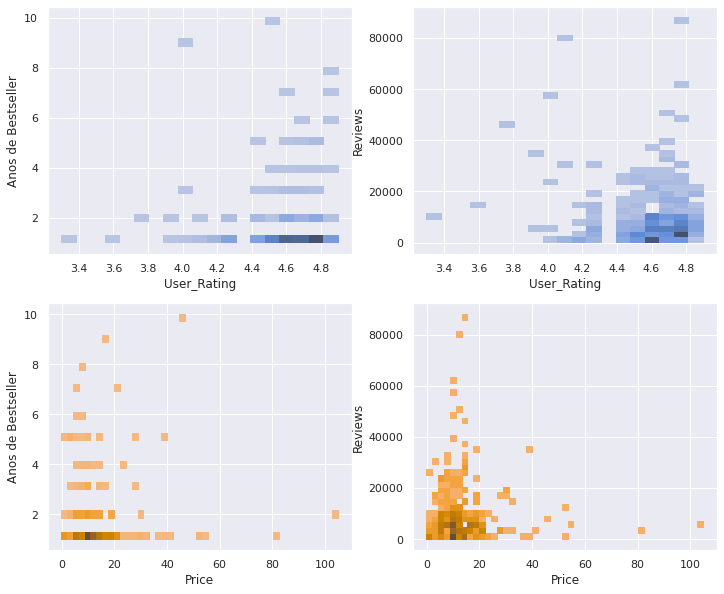

In [33]:
fig, ax =plt.subplots(2,2, figsize=(12,10))
srn.histplot(data=livros_anos, x='User_Rating',y='Anos de Bestseller',ax=ax[0][0])
srn.histplot(data=livros_anos, x='User_Rating',y='Reviews',ax=ax[0][1],label='User_Rating')
srn.histplot(data=livros_anos, x='Price',y='Anos de Bestseller',ax=ax[1][0], color='orange')
srn.histplot(data=livros_anos, x='Price',y='Reviews',ax=ax[1][1],label='Price', color='orange')

Através desses gráficos podemos ver que, para os gráficos azuis ('User_Rating'), temos uma região muito mais populosa para maiores notas médias, assim como, para os gráficos laranjas ('Price') temos regiões mais populosas para menores preços. Assim, isso indica que pode existir alguma relação desses fatores com os parâmetros de 'Anos de Bestseller' e 'Reviews', mas essa correlação existe? Preço ou nota média exerce maior influência?

Através desses gráficos também pode-se tentar correlacionar essas quantidades com distribuiçoes normais.

Vamos realizar um teste de hipótese para investigar os dois cenários.

Para o User_Rating

In [34]:
# Vamos verificar se há correlação linear entre 'User_Rating' e 'Anos de Bestseller':
alpha = 0.05 # significância desejada

data1 = livros_anos['User_Rating']
data2 = livros_anos['Anos de Bestseller']

# Retorna o coeficiente de correlação de Pearson e o valor p to teste de pearson
corr, p = pearsonr(data1, data2)

print("Coeficiente de correlação:", corr)

Coeficiente de correlação: 0.05128846164318053


In [35]:
# Vamos verificar se há correlação linear entre 'User_Rating' e 'Reviews'':
alpha = 0.05 # significância desejada

data1 = livros_anos['User_Rating']
data2 = livros_anos['Reviews']

# Retorna o coeficiente de correlação de Pearson e o valor p to teste de pearson
corr, p = pearsonr(data1, data2)

print("Coeficiente de correlação:", corr)

Coeficiente de correlação: -0.055690865123232035


Temos um coeficiente do User_Rating para os parâmetros de:
<li> Anos de Bestseller: 0.051 </li>
<li> Reviews: -0.055 </li>

Para o Price

In [36]:
# Vamos verificar se há correlação linear entre 'Price' e 'Anos de Bestseller':
alpha = 0.05 # significância desejada

data1 = livros_anos['Price']
data2 = livros_anos['Anos de Bestseller']

# Retorna o coeficiente de correlação de Pearson e o valor p to teste de pearson
corr, p = pearsonr(data1, data2)

print("Coeficiente de correlação:", corr)

Coeficiente de correlação: 0.009295922097474879


In [37]:
# Vamos verificar se há correlação linear entre 'Price' e 'Reviews':
alpha = 0.05 # significância desejada

data1 = livros_anos['Price']
data2 = livros_anos['Reviews']

# Retorna o coeficiente de correlação de Pearson e o valor p to teste de pearson
corr, p = pearsonr(data1, data2)

print("Coeficiente de correlação:", corr)

Coeficiente de correlação: -0.033600282256266704


Temos um coeficiente do Price para os parâmetros de:
<li> Anos de Bestseller: 0.0093 </li>
<li> Reviews: -0.033 </li>

###Conclusão

Ou seja, temos que os coeficientes de correlação do User_Rating com relação aos Anos de Bestseller e Reviews são maiores que aqueles do Price, ou seja, a Hipótese é valida.

#Outras analises:

Vamos ver para os livros melhores avaliados ('User_Rating' == 4.9), como é distribuido os Reviews, através de um gráfico. Vemos que mesmo para os melhores avaliados, há muita diferença no número de reviews realizadas.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


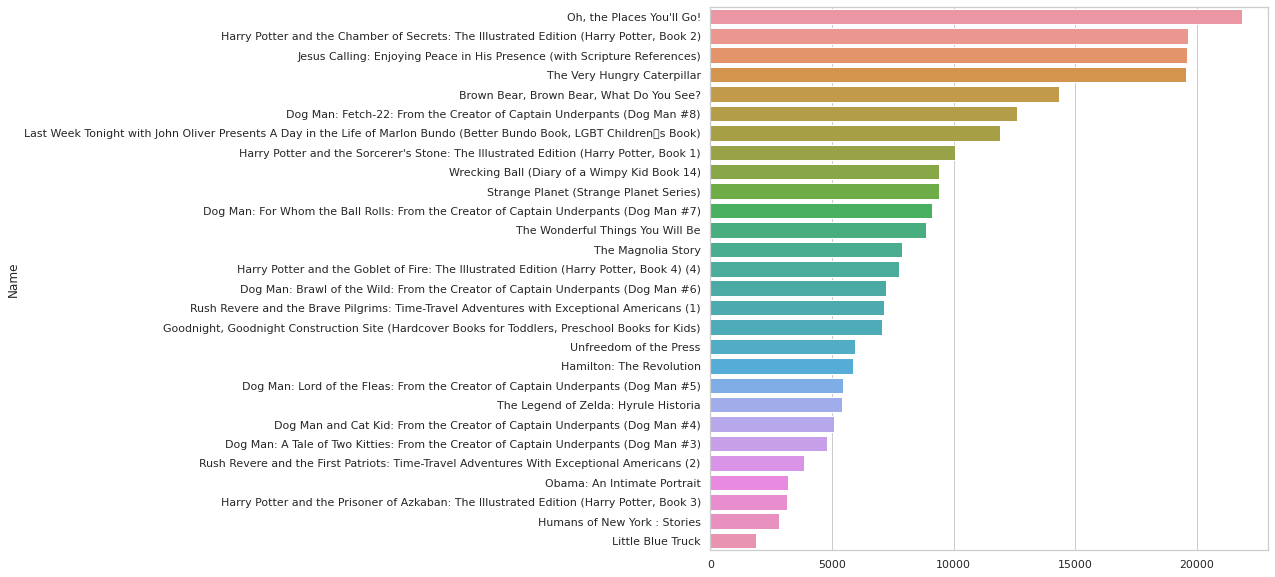

In [38]:
x=dados[dados["User_Rating"]==4.9]
y= x.groupby("Name").Reviews.mean().sort_values(ascending= False)
plt.figure(figsize= (10,10))
srn.set_style("whitegrid")
plot_xy = srn.barplot(x=y.values,y=y.index)
plt.show()

As reviews estão distribuidas como:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


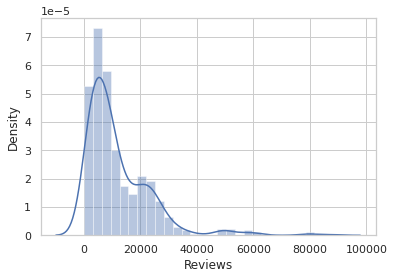

In [42]:
srn.distplot(dados.Reviews)

Vemos aqui o quanto o número de Reviews altera com o tempo:

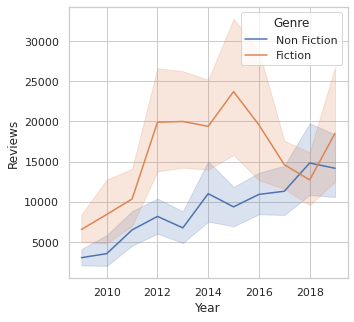

In [43]:
plt.figure(figsize= (5,5))
srn.lineplot(x= "Year",y= "Reviews",data= dados,hue="Genre")

Quanto os preços caminham com o tempo:

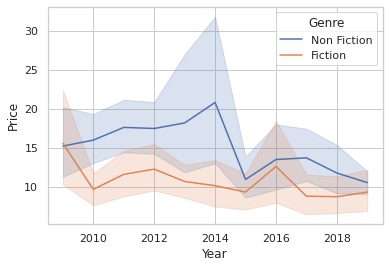

In [44]:
srn.lineplot(x= "Year",y= "Price",data= dados,hue="Genre")

Relação entre Price e User_Rating:

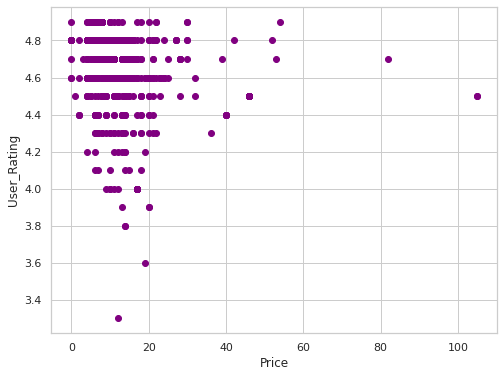

In [46]:
plt.figure(figsize=(8,6))
plt.scatter('Price', 'User_Rating', data=dados, color='purple')
plt.xlabel('Price')
plt.ylabel('User_Rating')
plt.show()